## Table of Contents 

### 01 Importing Libraries and Data
### 02 Data Wrangling 
### 03 Creating the Choropleth Map
### 04 Discussion

## 01 Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Create a project folder string

path = r'/Users/nora/Desktop/CareerFoundry Achievement 6'

In [4]:
# Import the data set

df_clean = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'airbnb_clean.csv'))

In [5]:
df_clean.head()

Unnamed: 0    id                                              name  \
0           0  2539                Clean & quiet apt home by the park   
1           1  2595                             Skylit Midtown Castle   
2           2  3647               THE VILLAGE OF HARLEM....NEW YORK !   
3           3  3831                   Cozy Entire Floor of Brownstone   
4           4  5022  Entire Apt: Spacious Studio/Loft by central park   

   host_id    host_name neighbourhood_group neighbourhood  latitude  \
0     2787         John            Brooklyn    Kensington  40.64749   
1     2845     Jennifer           Manhattan       Midtown  40.75362   
2     4632    Elisabeth           Manhattan        Harlem  40.80902   
3     4869  LisaRoxanne            Brooklyn  Clinton Hill  40.68514   
4     7192        Laura           Manhattan   East Harlem  40.79851   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -73.97237     Private room    149               1                  9   
1  -73.98377  Entire home/apt    225               1                 45   
2  -73.94190     Private room    150               3                  0   
3  -73.95976  Entire home/apt     89               1                270   
4  -73.94399  Entire home/apt     80              10                  9   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2018-10-19               0.21                               6   
1  2019-05-21               0.38                               2   
2         NaN                NaN                               1   
3  2019-07-05               4.64                               1   
4  2018-11-19               0.10                               1   

   availability_365  no_reviews  
0               365       False  
1               355       False  
2               365        True  
3               194       False  
4                 0       False

In [6]:
# Drop unnecessary column

df_clean = df_clean.drop('Unnamed: 0', 1)

In [7]:
df_clean.shape

(48894, 17)

In [3]:
# Import json

nyc_geo = r'/Users/nora/Desktop/CareerFoundry Achievement 6/02 Data/Original Data/2010 Neighborhood Tabulation Areas (NTAs).geojson'

In [13]:
# Look at the JSON file contents:

f = open(r'/Users/nora/Desktop/2010 Neighborhood Tabulation Areas (NTAs).geojson',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i) # Can't look at the contents here

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## 02 Data Wrangling 

In [18]:
# Create smaller dataframe 

df_small = df_clean[['neighbourhood', 'neighbourhood_group', 'price', 'price_category', 'latitude', 'longitude']]

In [19]:
# Rename column 

df_small.rename(columns = {'neighbourhood' : 'ntaname'}, inplace = True)
df_small.rename(columns = {'neighbourhood_group' : 'boro_name'}, inplace = True)

/Users/nora/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [20]:
df_small.head()

ntaname  boro_name  price price_category  latitude  longitude
0    Kensington   Brooklyn    149   Middle price  40.64749  -73.97237
1       Midtown  Manhattan    225     High price  40.75362  -73.98377
2        Harlem  Manhattan    150   Middle price  40.80902  -73.94190
3  Clinton Hill   Brooklyn     89   Middle price  40.68514  -73.95976
4   East Harlem  Manhattan     80   Middle price  40.79851  -73.94399

In [29]:
# Create new dataframe with mean price for each neighbourhood_group

df_mean = df_small.groupby('boro_name')['price'].mean()

df_mean.reset_index()

boro_name       price
0          Bronx   87.496792
1       Brooklyn  124.383207
2      Manhattan  196.880286
3         Queens   99.517649
4  Staten Island  114.812332

In [64]:
# Create new dataframe with mean price for each neighbourhood

pd.set_option('display.max_rows', None)

df_mean_2 = df_small.groupby('ntaname')['price'].mean()

df_mean_2.reset_index()

ntaname       price
0                      Allerton   87.595238
1                 Arden Heights   67.250000
2                      Arrochar  115.000000
3                       Arverne  171.779221
4                       Astoria  117.187778
5                    Bath Beach   81.764706
6             Battery Park City  367.557143
7                     Bay Ridge  144.432624
8                   Bay Terrace  142.000000
9    Bay Terrace, Staten Island  102.500000
10                   Baychester   75.428571
11                      Bayside  157.948718
12                    Bayswater   87.470588
13           Bedford-Stuyvesant  107.678244
14                 Belle Harbor  171.500000
15                    Bellerose   99.357143
16                      Belmont   77.125000
17                  Bensonhurst   75.786667
18                 Bergen Beach  106.700000
19                  Boerum Hill  176.135593
20                 Borough Park   63.066176
21                 Breezy Point  213.333333
22                    Briarwood  105.875000
23               Brighton Beach  131.933333
24                    Bronxdale   57.105263
25             Brooklyn Heights  209.064935
26                  Brownsville   76.459016
27                  Bull's Head   47.333333
28                     Bushwick   84.800406
29              Cambria Heights   81.730769
30                     Canarsie  104.367347
31              Carroll Gardens  175.914163
32                  Castle Hill   63.000000
33            Castleton Corners  139.750000
34                      Chelsea  249.738544
35                    Chinatown  161.497283
36                  City Island  173.000000
37                 Civic Center  191.942308
38            Claremont Village   87.464286
39                 Clason Point  112.761905
40                      Clifton   84.933333
41                 Clinton Hill  181.893357
42                   Co-op City   77.500000
43                  Cobble Hill  211.929293
44                College Point   88.000000
45                  Columbia St  162.952381
46                      Concord   58.192308
47                    Concourse   86.180000
48            Concourse Village   73.781250
49                 Coney Island  123.705882
50                       Corona   59.171875
51                Crown Heights  112.480179
52                Cypress Hills  128.903704
53                        DUMBO  196.305556
54             Ditmars Steinway   95.029126
55                 Dongan Hills   79.428571
56                   Douglaston   82.750000
57            Downtown Brooklyn  150.349398
58                Dyker Heights   93.416667
59                East Elmhurst   81.183784
60                East Flatbush  104.222000
61                  East Harlem  133.198747
62              East Morrisania   85.000000
63                East New York   85.426606
64                 East Village  186.083108
65                  Eastchester  141.692308
66                     Edenwald   82.000000
67                     Edgemere   94.727273
68                     Elmhurst   80.459916
69                  Eltingville  141.666667
70                 Emerson Hill   68.200000
71                 Far Rockaway  165.862069
72                    Fieldston   75.083333
73           Financial District  225.490591
74                     Flatbush   92.212560
75            Flatiron District  341.925000
76                    Flatlands  126.433735
77                     Flushing   93.514085
78                      Fordham   69.444444
79                 Forest Hills  121.625000
80                  Fort Greene  151.374233
81                Fort Hamilton   93.818182
82               Fort Wadsworth  800.000000
83                Fresh Meadows   99.500000
84                     Glendale   90.796296
85                      Gowanus  158.801619
86                     Gramercy  222.754438
87                 Graniteville   68.666667
88                   Grant City   57.666667
89                    Gravesend   79.014706
90                  

## 03 Creating the Choropleth Map

In [79]:
# Setup a folium map: mean price per neighbourhood_group

m = folium.Map([40.730610, -73.935242], zoom_start=10)

# Create choropleth using folium
folium.Choropleth(
             geo_data = nyc_geo, 
             data = df_mean,
             columns = ['boro_name', 'price'],
             key_on = 'feature.properties.boro_name', 
             fill_color = 'YlOrRd', 
             fill_opacity=0.7, 
             line_opacity=0.2,
             legend_name = "mean_price",
             highlight=True
).add_to(m)

m

/Users/nora/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


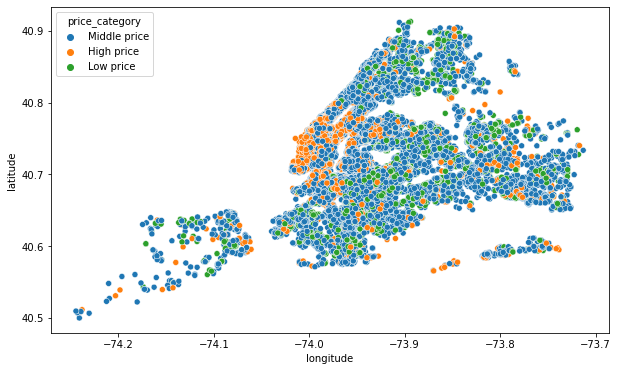

In [80]:
# See where high, middle and low price Airbnbs are located

plt.figure(figsize=(10,6))
price_scatter = sns.scatterplot(df_clean.longitude, df_clean.latitude , hue = df_clean.price_category)
plt.title('', fontsize=12)
plt.ioff()

In [67]:
# Saving the map

m.save(r'/Users/nora/Desktop/CareerFoundry Achievement 6/04 Analysis/Visualizations/map.html')

In [69]:
# Saving other visualizations

price_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_scatter.png'))

## 04 Discussion

#### Discuss the results and what they mean in a markdown section. Does the analysis answer any of your existing research questions? Does the analysis lead you to any new research questions?

The analysis shows the mean prices per neighbourhood group. One of my research questions was regarding the price difference between neighbourhoods so I got some insight regarding that question. 

Unfortunately I was not able to visualize the prices of the neighbourhoods because not all the names of neighbourhoods matched between data sets. I was not able to fix this since I could not look at the neighbourhood names of the Json file. As an alternative, I visualized the distribution of low, middle and high priced Airbnbs using the longitude and latitude variables. This allows me to see clusters of expensive Airbnbs (for instance in lower Manhattan). This is quite useful, however I need to crosscheck with a map of New York to be able to interpret the scatterplot. 

It would be interesting to see how the price and number of Airbnb listings developed over time, for instance in the last 10 years. 
